# scikit-learn の Toy dataset の扱い方

<font color=blue>
公式ドキュメント:

[7.1. Toy datasets — scikit-learn 0.24.1 documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#toy-datasets)
    

</font>

In [1]:
from sklearn import datasets 

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
%%html
<style>table { float:left }</style>

## <hr>Boston house prices dataset

<font color=blue>
    
> The Boston house-price data has been used in many machine learning papers that address regression problems.<br>
  
ボストンの住宅価格。<br>
よく論文では回帰モデルの検証で使われている。    
</font>

In [3]:
d_boston = datasets.load_boston()

In [4]:
dir(d_boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
df_boston = pd.DataFrame(
    d_boston['data'], 
    columns=d_boston['feature_names']
)

In [6]:
df_boston['PRICE'] = d_boston['target']
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print(f'Dataset num; {len(df_boston)}')

Dataset num; 506


<font color=blue>カラムの意味</font>

| カラム名 | 意味 |
| :- | :- |
| CRIM | 町民一人当たりの犯罪率 |
| ZN | 25,000平方フィートを超える区画にゾーニングされた住宅用地の割合 |
| INDUS | 町ごとの非小売業用地の割合 |
| CHAS | 道路が川に面してる場合は1, それ以外は0（カテゴリ変数） |
| NOX | 一酸化窒素濃度（1000万分の1） |
| RM | 住居当たりの平均部屋数 |
| AGE | 1940年より前に建てられた持ち家の割合 |
| DIS | 5つのボストン雇用センターまでの加重距離 |
| RAD | 放射状高速道路へのアクセシビリティの指標（カテゴリ変数） |
| TAX | 10,000ドルあたりの全額固定資産税 |
| PTRATIO | 町ごとの生徒と教師の割合 |
| B | 町ごとの黒人の割合 |
| LSTAT | 人口のより低い状態（人口の割合？） |
| PRICE | 住宅の価格（目的変数） |

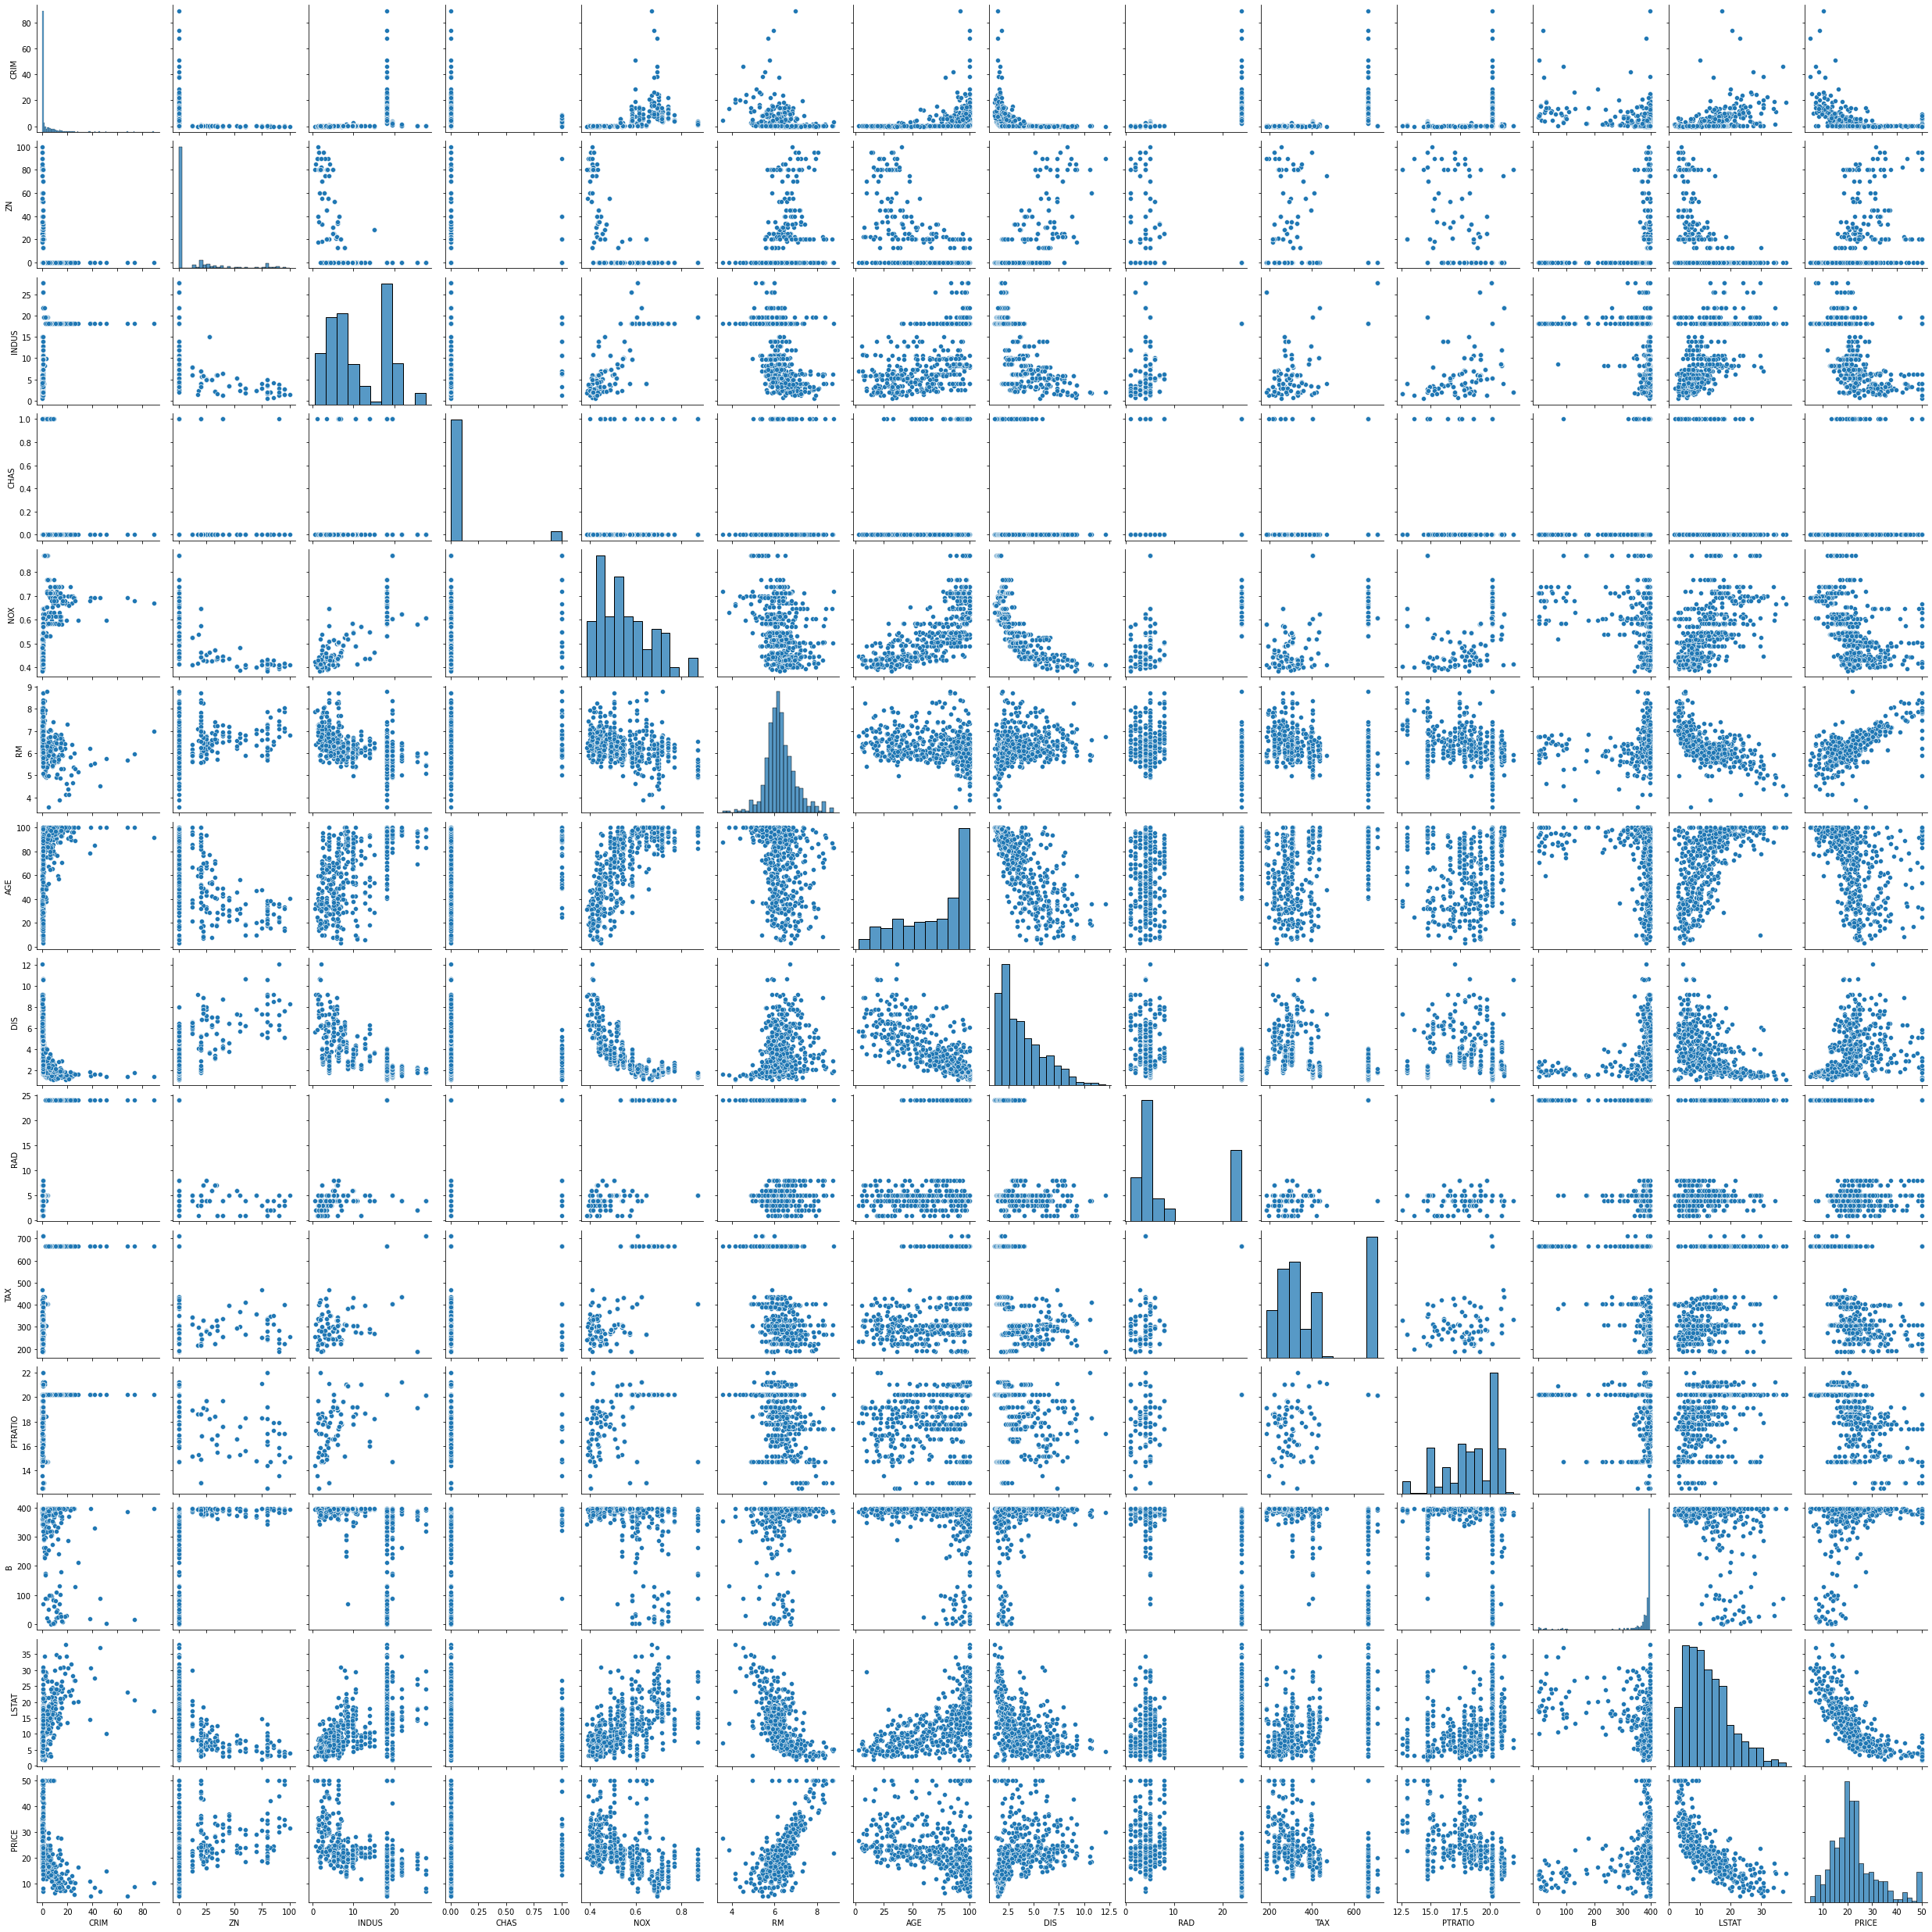

In [8]:
sns.pairplot(df_boston)

<font color=blue>CRIM, NOX, RM, LSTATあたりがPRICEと強い相関。</font>

## <hr>Iris plants dataset

<font color=blue>
植物のアヤメの花びら、ガクの特徴をまとめたデータ。<br>
分類モデルでよく使われる。

> The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

アヤメの種類ごとに 3つのグループを含んでおり、それぞれのグループに 50データ含まれている。
</font>

In [9]:
d_iris = datasets.load_iris()

In [10]:
dir(d_iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
df_iris = pd.DataFrame(
    d_iris['data'],
    columns=d_iris['feature_names']
)
df_iris['target'] = d_iris['target']
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
print(f'Dataset num; {len(df_iris)}')

Dataset num; 150


In [13]:
for i in df_iris['target'].unique():
    print(f'{str(i)}; {d_iris["target_names"][i]} Group:\
    \nDataset num; {len(df_iris[df_iris["target"]==i])}\n')


0; setosa Group:    
Dataset num; 50

1; versicolor Group:    
Dataset num; 50

2; virginica Group:    
Dataset num; 50



<font color=blue>カラムの意味</font>

| カラム名 | 意味 |
| :- | :- |
| sepal length (cm) | ガクの長さ (cm) |
| sepal width (cm) | ガクの幅 (cm) |
| petal length (cm) | 花びらの長さ (cm) |
| petal width (cm) | 花びらの幅 (cm) |
| target | アヤメの種類（カテゴリ変数、0:setosa, 1:versicolor, 2:virginica） |

## <hr>Diabetes dataset

<font color=blue>

> Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

糖尿病患者についてのデータ。442人の糖尿病患者の10個のベースライン変数と、ベースラインからの1年後の疾患進行の定量的な測定値を持っている。<br>

> Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

なお、それぞれのベースライン変数は平均中心化、及び標準化されている。目的変数が疾患進行の定量的数値なので、回帰モデルで利用できそう。
</font>

In [14]:
d_diabetes = datasets.load_diabetes()

In [15]:
dir(d_diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [16]:
df_diabetes = pd.DataFrame(
    d_diabetes['data'],
    columns=d_diabetes['feature_names']
)
df_diabetes['target'] = d_diabetes['target']
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [17]:
print(f'Dataset num; {len(df_diabetes)}')

Dataset num; 442


<font color=blue>カラムの意味</font>

| カラム名 | 意味 |
| :- | :- |
| age | 年齢 |
| sex | 性別 |
| bmi | BMI（ボディマス指数？） |
| bp | 平均血圧 |
| s1 | T細胞（白血球の一種） |
| s2 | 低密度リポタンパク質 |
| s3 | 高濃度リポタンパク質 |
| s4 | 甲状腺刺激ホルモン |
| s5 | ラモトリジン |
| s6 | 血糖値 |
| target | 疾患進行の定量的数値 |

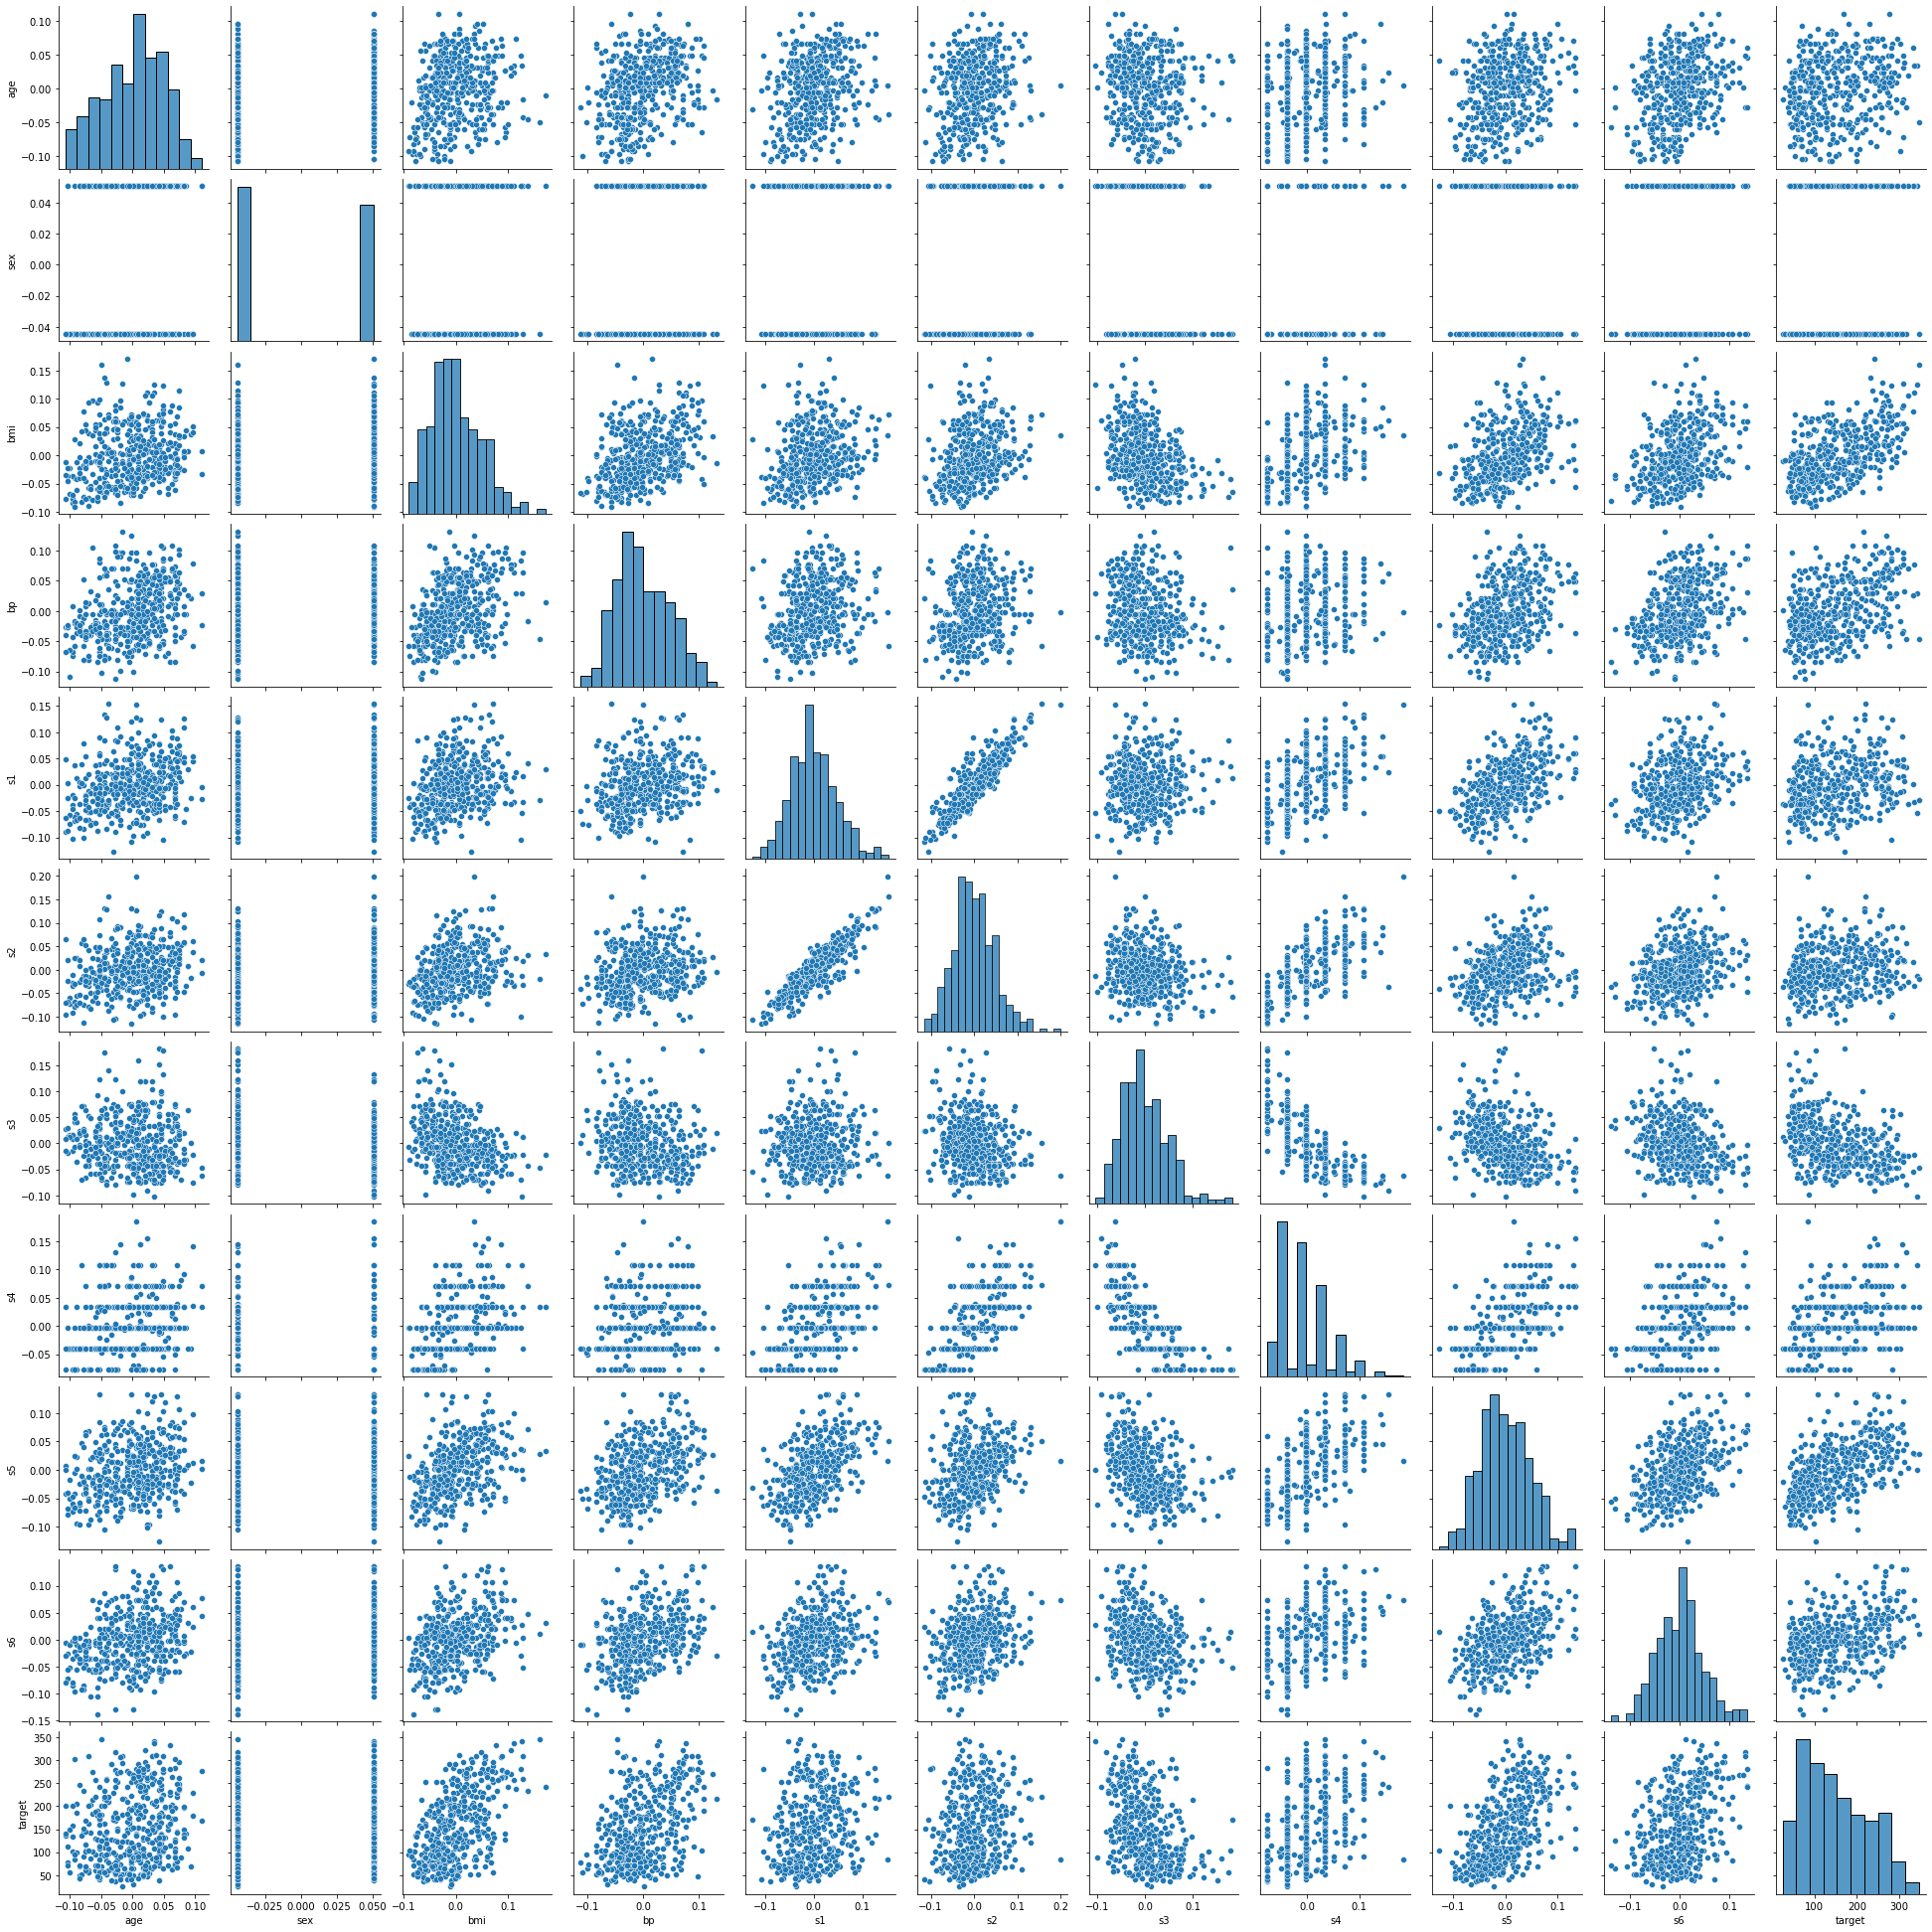

In [18]:
sns.pairplot(df_diabetes)

<font color=blue>bmi, s5, s6 に強い相関</font>

## <hr>Optical recognition of handwritten digits dataset